<a href="https://colab.research.google.com/github/AmmaraYounas/ML-Projects/blob/main/Copy_of_COVIDECT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt

In [ ]:
ROOT_DIR = "/content/drive/MyDrive/Colab Notebooks/Dataset_COVID"
imgs = ['COVID','Normal']

NEW_DIR = "/content/drive/MyDrive/Colab Notebooks/all_images/"

In [ ]:
if not os.path.exists(NEW_DIR):
  os.mkdir(NEW_DIR)

  for i in imgs:
    org_dir = os.path.join(ROOT_DIR, i+"/")

    for imgfile in glob.iglob(os.path.join(org_dir, "*.png")):
      shutil.copy(imgfile, NEW_DIR)

else:
  print("Already Exist")

In [ ]:
counter = {'COVID':0,'Normal':0}

for image in imgs:
  for count in glob.iglob(NEW_DIR+image+"*"):
    counter[image] += 1

# the number of images i have in each class
counter

{'COVID': 1000, 'Normal': 1000}

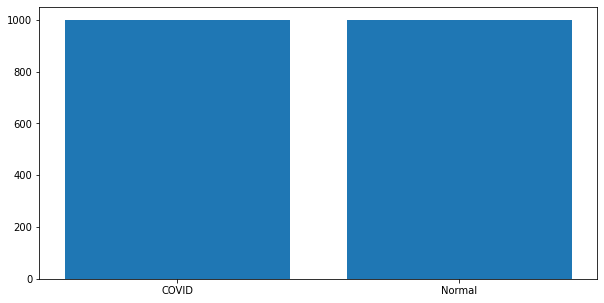

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(x = counter.keys(), height= counter.values())
plt.show()

In [ ]:
if not os.path.exists(NEW_DIR+"train_test_split/"):

  os.makedirs(NEW_DIR+"train_test_split/")

  os.makedirs(NEW_DIR+"train_test_split/train/Normal")
  os.makedirs(NEW_DIR+"train_test_split/train/Covid")

  os.makedirs(NEW_DIR+"train_test_split/test/Normal")
  os.makedirs(NEW_DIR+"train_test_split/test/Covid")

  os.makedirs(NEW_DIR+"train_test_split/validation/Normal")
  os.makedirs(NEW_DIR+"train_test_split/validation/Covid")

In [ ]:
# Train Data
for i in np.random.choice(replace= False, size=700 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

In [ ]:
for i in np.random.choice(replace= False , size= 700 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )
    os.remove(i)

In [ ]:
# Validation Data
for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Normal" )
    os.remove(i)


In [ ]:
 # Test Data
for i in np.random.choice(replace= False , size= 100 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

for i in np.random.choice(replace= False , size= 100 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Normal" )
    os.remove(i)



In [ ]:
train_path  = "/content/drive/MyDrive/Colab Notebooks/all_images/train_test_split/train"
valid_path  = "/content/drive/MyDrive/Colab Notebooks/all_images/train_test_split/validation"
test_path   = "/content/drive/MyDrive/Colab Notebooks/all_images/train_test_split/test"

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras

In [ ]:
train_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , zoom_range= 0.2, horizontal_flip= True, shear_range= 0.2 , rescale= 1./255)
train = train_data_gen.flow_from_directory(directory= train_path , target_size=(224,224))

Found 1400 images belonging to 2 classes.


In [ ]:
validation_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , rescale= 1./255 )
valid = validation_data_gen.flow_from_directory(directory= valid_path , target_size=(224,224))

Found 400 images belonging to 2 classes.


In [ ]:
test_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input, rescale= 1./255 )
test = train_data_gen.flow_from_directory(directory= test_path , target_size=(224,224), shuffle= False)

Found 200 images belonging to 2 classes.


In [ ]:
train.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
class_type = {0:'Covid',  1 : 'Normal'}

In [ ]:
t_img , label = train.next()

In [ ]:
def plotImages(img_arr, label):

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

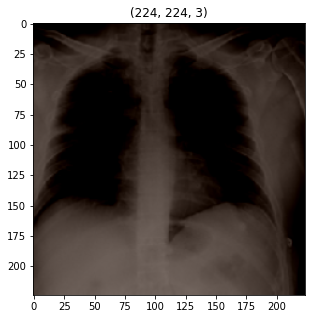

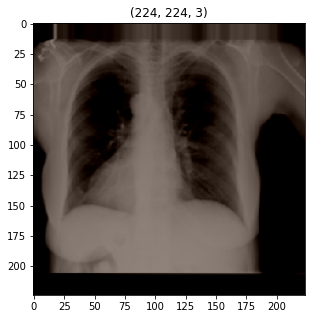

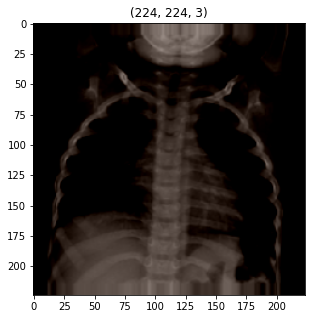

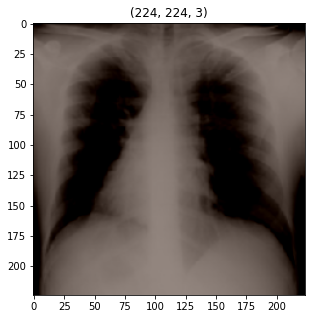

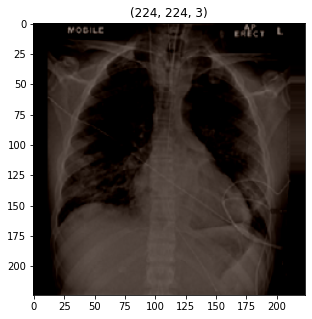

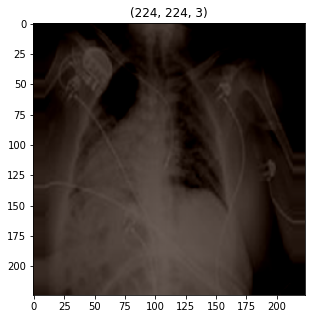

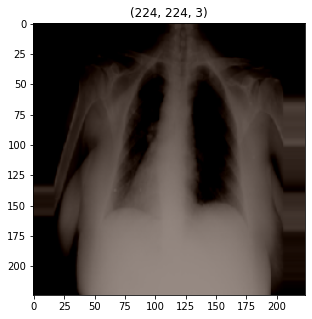

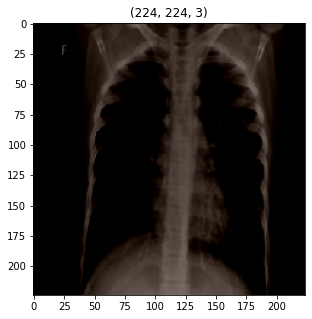

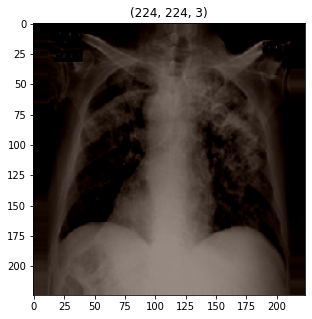

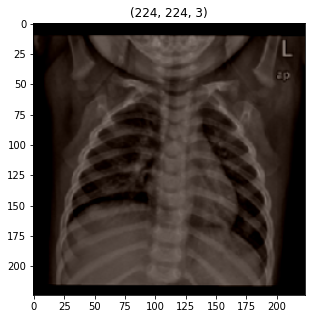

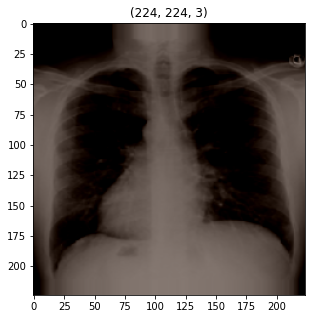

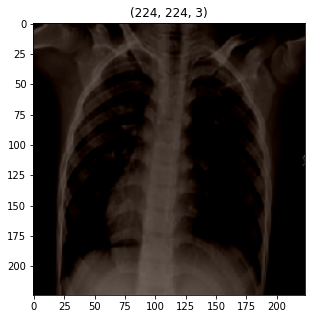

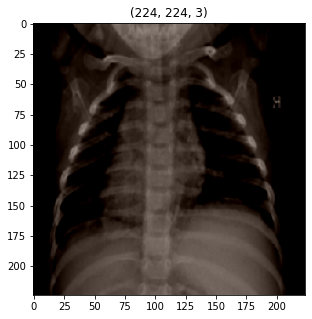

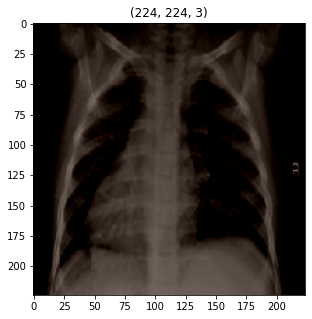

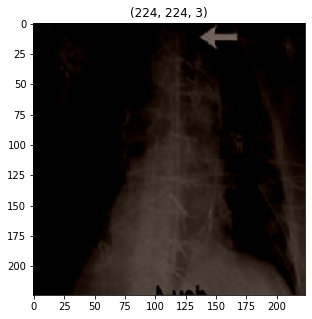

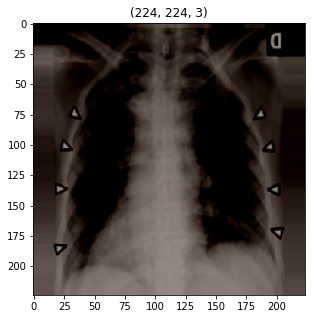

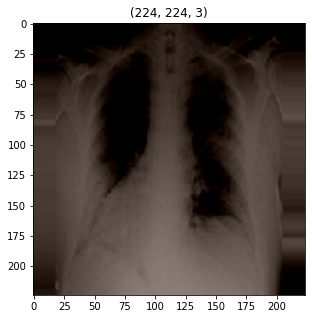

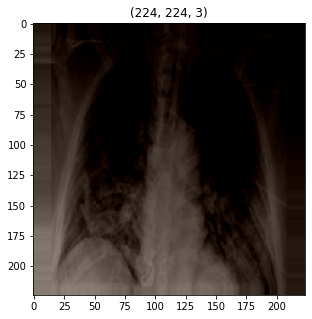

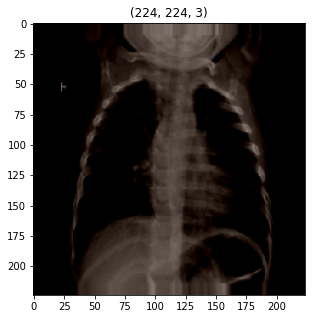

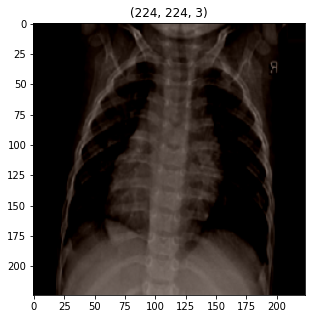

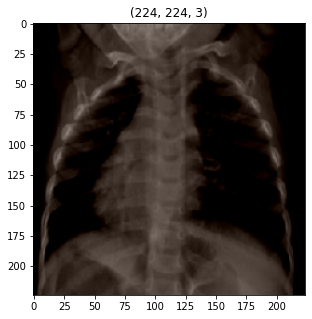

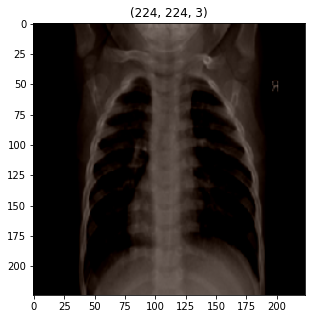

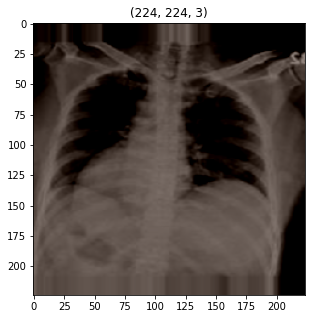

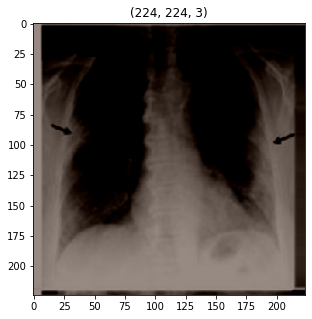

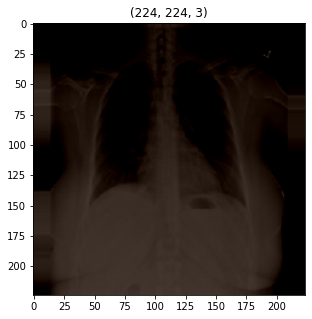

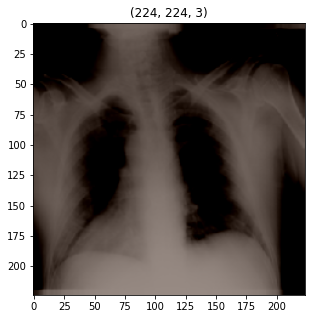

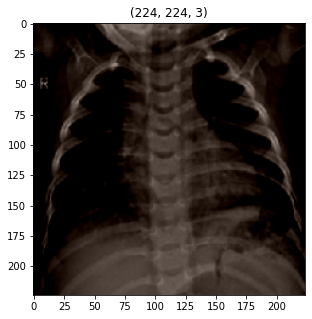

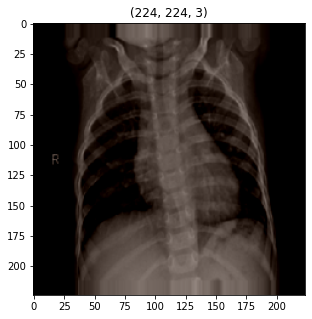

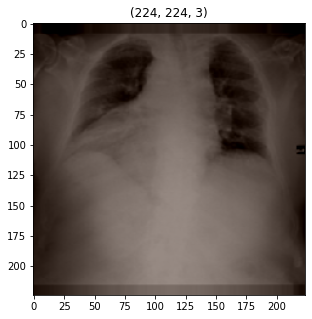

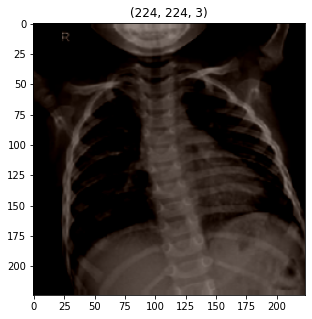

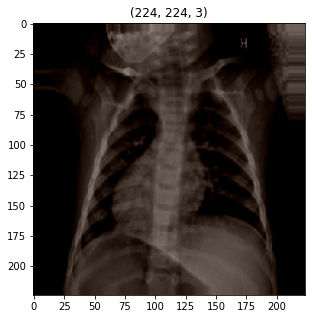

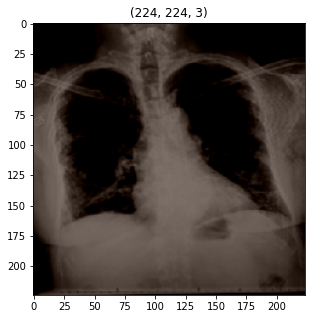

In [ ]:
plotImages(t_img, label)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [ ]:
vgg = VGG16( input_shape=(224,224,3), include_top= False) # include_top will consider the new weights

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:           # Dont Train the parameters again
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

model = Model(vgg.input, x)

In [ ]:
model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# implementing early stopping and model check point

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [ ]:
#hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 8, validation_data= valid , validation_steps= 32)
hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , validation_steps= 32, callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 0.5076 - accuracy: 0.7875


Epoch 1: val_accuracy improved from -inf to 0.96250, saving model to bestmodel.h5
10/10 [==============================] - 12s 919ms/step - loss: 0.5076 - accuracy: 0.7875 - val_loss: 0.1471 - val_accuracy: 0.9625
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.2149 - accuracy: 0.9438

10/10 [==============================] - 5s 481ms/step - loss: 0.2149 - accuracy: 0.9438
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.1555 - accuracy: 0.9625

10/10 [==============================] - 5s 477ms/step - loss: 0.1555 - accuracy: 0.9625
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.1924 - accuracy: 0.9438

10/10 [==============================] - 5s 482ms/step - loss: 0.1924 - accuracy: 0.9438
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 0.2416 - accuracy: 0.9375

10/10 [==============================] - 5s 481ms/step - loss: 0.2416 - accuracy: 0.9375
Epoch 6/30
10/10 [==============================] - ETA: 0s - loss: 0.1396 - accuracy: 0.9487

10/10 [==============================] - 8s 784ms/step - loss: 0.1396 - accuracy: 0.9487
Epoch 7/30
10/10 [==============================] - ETA: 0s - loss: 0.1361 - accuracy: 0.9500

10/10 [==============================] - 5s 485ms/step - loss: 0.1361 - accuracy: 0.9500
Epoch 8/30
10/10 [==============================] - ETA: 0s - loss: 0.0512 - accuracy: 0.9844

10/10 [==============================] - 5s 488ms/step - loss: 0.0512 - accuracy: 0.9844
Epoch 9/30
10/10 [==============================] - ETA: 0s - loss: 0.1240 - accuracy: 0.9647

10/10 [==============================] - 5s 471ms/step - loss: 0.1240 - accuracy: 0.9647
Epoch 10/30
10/10 [==============================] - ETA: 0s - loss: 0.0946 - accuracy: 0.9744

10/10 [==============================] - 5s 471ms/step - loss: 0.0946 - accuracy: 0.9744
Epoch 11/30
10/10 [==============================] - ETA: 0s - loss: 0.0783 - accuracy: 0.9776

10/10 [==============================] - 5s 467ms/step - loss: 0.0783 - accuracy: 0.9776
Epoch 12/30
10/10 [==============================] - ETA: 0s - loss: 0.0516 - accuracy: 0.9812

10/10 [==============================] - 5s 484ms/step - loss: 0.0516 - accuracy: 0.9812
Epoch 13/30
10/10 [==============================] - ETA: 0s - loss: 0.1727 - accuracy: 0.9469

10/10 [==============================] - 5s 480ms/step - loss: 0.1727 - accuracy: 0.9469
Epoch 14/30
10/10 [==============================] - ETA: 0s - loss: 0.0741 - accuracy: 0.9781

10/10 [==============================] - 5s 483ms/step - loss: 0.0741 - accuracy: 0.9781
Epoch 15/30
10/10 [==============================] - ETA: 0s - loss: 0.0858 - accuracy: 0.9594

10/10 [==============================] - 5s 484ms/step - loss: 0.0858 - accuracy: 0.9594
Epoch 16/30
10/10 [==============================] - ETA: 0s - loss: 0.0547 - accuracy: 0.9844

10/10 [==============================] - 5s 486ms/step - loss: 0.0547 - accuracy: 0.9844
Epoch 17/30
10/10 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9840

10/10 [==============================] - 5s 466ms/step - loss: 0.0439 - accuracy: 0.9840
Epoch 18/30
10/10 [==============================] - ETA: 0s - loss: 0.0601 - accuracy: 0.9812

10/10 [==============================] - 5s 505ms/step - loss: 0.0601 - accuracy: 0.9812
Epoch 19/30
10/10 [==============================] - ETA: 0s - loss: 0.0646 - accuracy: 0.9781

10/10 [==============================] - 5s 503ms/step - loss: 0.0646 - accuracy: 0.9781
Epoch 20/30
10/10 [==============================] - ETA: 0s - loss: 0.0711 - accuracy: 0.9776

10/10 [==============================] - 5s 481ms/step - loss: 0.0711 - accuracy: 0.9776
Epoch 21/30
10/10 [==============================] - ETA: 0s - loss: 0.0579 - accuracy: 0.9812

10/10 [==============================] - 5s 484ms/step - loss: 0.0579 - accuracy: 0.9812
Epoch 22/30
10/10 [==============================] - ETA: 0s - loss: 0.0677 - accuracy: 0.9750

10/10 [==============================] - 5s 482ms/step - loss: 0.0677 - accuracy: 0.9750
Epoch 23/30
10/10 [==============================] - ETA: 0s - loss: 0.0675 - accuracy: 0.9744

10/10 [==============================] - 6s 597ms/step - loss: 0.0675 - accuracy: 0.9744
Epoch 24/30
10/10 [==============================] - ETA: 0s - loss: 0.0852 - accuracy: 0.9656

10/10 [==============================] - 5s 481ms/step - loss: 0.0852 - accuracy: 0.9656
Epoch 25/30
10/10 [==============================] - ETA: 0s - loss: 0.0522 - accuracy: 0.9844

10/10 [==============================] - 5s 481ms/step - loss: 0.0522 - accuracy: 0.9844
Epoch 26/30
10/10 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.9781

10/10 [==============================] - 5s 479ms/step - loss: 0.0482 - accuracy: 0.9781
Epoch 27/30
10/10 [==============================] - ETA: 0s - loss: 0.0706 - accuracy: 0.9750

10/10 [==============================] - 5s 480ms/step - loss: 0.0706 - accuracy: 0.9750
Epoch 28/30
10/10 [==============================] - ETA: 0s - loss: 0.0721 - accuracy: 0.9719

10/10 [==============================] - 5s 478ms/step - loss: 0.0721 - accuracy: 0.9719
Epoch 29/30
10/10 [==============================] - ETA: 0s - loss: 0.1142 - accuracy: 0.9469

10/10 [==============================] - 5s 479ms/step - loss: 0.1142 - accuracy: 0.9469
Epoch 30/30
10/10 [==============================] - ETA: 0s - loss: 0.0860 - accuracy: 0.9712

10/10 [==============================] - 5s 467ms/step - loss: 0.0860 - accuracy: 0.9712


In [ ]:
from keras.models import load_model
model = load_model("bestmodel.h5")

In [ ]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )

  return img

In [ ]:
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} %")
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} %")

The given X-Ray image is of type = Covid

The chances of image being Covid is : 81.96595907211304 %
The chances of image being Normal is : 79.34945225715637 %


In [ ]:
import tensorflow as tf

In [ ]:
# this function is udes to generate the heat map of aan image


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
import matplotlib.cm as cm

from IPython.display import Image, display
import keras

In [ ]:
# put the heatmap to our image to understand the area of interest

def save_and_display_gradcam(img_path , heatmap, cam_path="cam.jpg", alpha=0.4):
    """
    img input shoud not be expanded
    """

    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)


    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))




In [ ]:
# function that is used to predict the image type and the ares that are affected by covid
def detect_covid(path):
    img = get_img_array(path)
    res = class_type[np.argmax(model.predict(img))]
    return res


def covid_percent(path):
    img = get_img_array(path)
    if detect_covid(path)=='Covid':
        print()
        return f"The chances of image being Covid is : {model.predict(img)[0][0]*100} %"
    else:
        print()
        return f"The chances of image being Normal is : {model.predict(img)[0][1]*100} %"


def display_heatmap(path):
    img_array = get_img_array(path)
    heatmap = make_gradcam_heatmap(img_array, model, "block5_conv3")
    return save_and_display_gradcam(path, heatmap)



# function that is used to predict the image type and the ares that are affected by covid


def image_prediction_and_visualization(path,last_conv_layer_name = "block5_conv3", model = model):
  """
  input:  is the image path, name of last convolution layer , model name
  output : returs the predictions and the area that is effected
  """



  img_array = get_img_array(path)

  heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

  img = get_img_array(path)

  res = class_type[np.argmax(model.predict(img))]
  print(f"The given X-Ray image is of type = {res}")
  print()
  print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} %")
  print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} %")

  print()
  print("image with heatmap representing the covid spot")

  # function call
  save_and_display_gradcam(path, heatmap)

  print()
  print("the original input image")
  print()

  a = plt.imread(path)
  plt.imshow(a, cmap = "gray")
  plt.title("Original image")
  plt.show()


In [ ]:
#predictions
# provide the path of any image from google or any other scource
# the path is already defigned above , but you can also provide the path here to avoid scrolling up

# for covid image :

path = "/content/drive/MyDrive/Dataset/COVID/COVID-1028.png"

detect_covid(path)

##

##

'Covid'

In [ ]:
covid_percent(path)

'The chances of image being Covid is : 81.96595907211304 %'

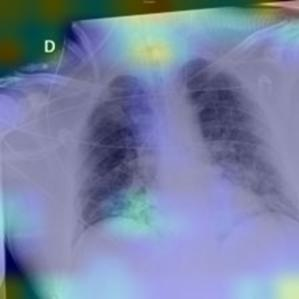

In [ ]:
display_heatmap(path)

The given X-Ray image is of type = Covid

The chances of image being Covid is : 81.96595907211304 %
The chances of image being Normal is : 79.34945225715637 %

image with heatmap representing the covid spot


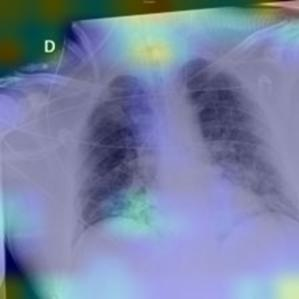


the original input image



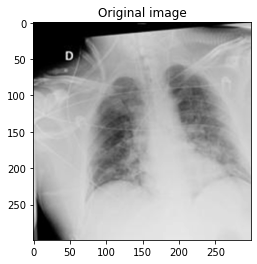

In [ ]:
image_prediction_and_visualization(path)

In [ ]:
import pickle

with open('model','wb') as f:
  pickle.dump(model,f)